#### Introduction
Estimates of individual branch lengths can be unbiased, or can be consistently over- or under-estimated depending on their location within a phylogeny. Nevertheless, RAM55 tends to more accurately estimate the correct evolutionary distance between sequences regardless of tree size (number of taxa), length of the examined branch or branch positioning in the tree. Here highligh one internal branch for each of four topologies, which illustrates this with branch length estimates from RAM55 having smaller variances, and medians nearer to the reference values, than estimates from LG; these results are representative of those obtained for other branches (results not shown). The additional $\chi_{1}$ configuration information contained in RAM55 is thus allowing us to infer more-reliable phylogenies from alignments simulated under the 55-state model itself than does any of the 20-state models investigated.

### Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import itertools
import seaborn as sb

plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc('font', serif='Helvetica Neue')

palette = [(0.038627450980392108, 0.4409803921568628, 0.66333333333333333),
           (0.82803921568627448, 0.54921568627450967, 0.062156862745098129),
           (0.038431372549019627, 0.58901960784313723, 0.43725490196078431),
           (0.79352941176470593, 0.37352941176470594, 0.041764705882352926),
           (0.78352941176470581, 0.48705882352941177, 0.72705882352941142),
           (0.7715686274509802, 0.57039215686274503, 0.40098039215686276)]

In [1]:
args = "55x55,LG int_sec-short,\
int_sec-long,lf_sec-short,lf_sec-long 4,8,16,32,64".split(" ")

models = args[0].split(",")
bran_types = args[1].split(",")
taxa = args[2].split(",")
model_num = len(models)
colors = [sb.color_palette("colorblind", 5, desat=.9)[
    0], sb.color_palette("colorblind", 5, desat=.9)[2]]

cols = int(len(bran_types) * len(taxa) / 2)
rows = int(len(bran_types) / 2)
fig, axs = plt.subplots(cols, rows, figsize=(20, 20), sharex=True, sharey=True)
fig.subplots_adjust(hspace=.3, wspace=.3)

# requires header
data = pd.read_csv("data/alignmentALLx200x20_scaled-branches_evo_simulation.\
55x55_superscaled_AND_guide-treevLG.1char_rotasequence.single-brlen_compare", sep="\t", header=0).dropna()
data.astype(np.float)

x = data['scale'].drop_duplicates().values

# one subplot per bran_type and taxa product
# i.e. 16_taxa_*_lf_sec-short
for ax, product in zip(axs.ravel(), list(itertools.product(bran_types, taxa))):
    bran_type, taxa = product
    patches = []
    displacement = -.1 * ((model_num - 1) / 2)

    # get the corresponding columns (one per model + one reference)
    fltr_df = data.filter(
        regex='^' + taxa + '_taxa_.*_' + bran_type + '|scale')

    # plot the reference
    y = fltr_df.filter(regex='.*REF.*').drop_duplicates().values
    ref_label = fltr_df.filter(regex='.*REF.*').columns[0]
    ax.plot(x, y, '--', marker="o", color="k",
            label=ref_label, zorder=10, markersize=1)
    ax.legend()

    # one boxplot per model per scaling factor,
    # models are arranged around actual x coord in order not to superimpose

    fltr_df.drop(ref_label, 1, inplace=True)
    fltr_gp_df = fltr_df.groupby('scale', sort=False)

    for label, color in zip(fltr_df.drop('scale', 1).columns, colors):
        adjusted_x = [v + displacement for v in x]
        displacement = displacement + (.03 * model_num)
        y = []
        for scale in x:
            y.append(fltr_gp_df.get_group(scale)[label].values)
        np.array(y)
        bp = ax.boxplot(y, patch_artist=True, widths=.04, positions=adjusted_x)
        patches.append(mpatches.Patch(color=color, label=label))
        for box in bp['boxes']:
            # change outline color
            box.set(color='#000000', linewidth=0.01)
            # change fill color
            box.set(facecolor=color)
            # change color and linewidth of the whiskers
            for whisker in bp['whiskers']:
                whisker.set(color='#000000', linewidth=0.9)
            # change color and linewidth of the caps
            for cap in bp['caps']:
                cap.set(color='#000000', linewidth=0.9)
            # change color and linewidth of the medians
            for median in bp['medians']:
                median.set(color='#000000', linewidth=0.05)
            # change the style of fliers and their fill
            for flier in bp['fliers']:
                flier.set(marker='.', color=color, markersize=1)
        # subplot title
        ax.set_title(taxa + ' taxa ' + bran_type)
        ax.set_xticklabels(x, rotation=45)
        majorLocator = ticker.FixedLocator(x)
        ax.xaxis.set_major_locator(majorLocator)

# set figure style and font
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc('font', serif='Helvetica Neue')

fig.text(0.5, 0.04, 'Scaling factor', ha='center', va='center', size='x-large')
fig.text(0.06, 0.5, 'Branch length', ha='center',
         va='center', rotation='vertical', size='x-large')

plt.figlegend(patches, models, loc='upper center', ncol=2)
plt.savefig("Figures/vis_single_brlen.svg", format='svg',
            bbox_inches='tight', dpi=fig.dpi)
plt.savefig("Figures/vis_single_brlen.pdf", format='pdf',
            bbox_inches='tight', dpi=fig.dpi)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [4]:

!matrix2tab data/alignmentALLx200x100_scaled-branches_evo_simulation.55x55_superscaled_AND_guide-treevLG.1char_rotasequence.single-brlen_compare \
| sed 's/_taxa_/ /g ; s/[G,F,5]_/& /g ; s/_ / /g' | tr " " "\t" >data/ALL_input.txt

/Users/uperron/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/uperron/miniconda2/envs/python3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/uperron/miniconda2/envs/python3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


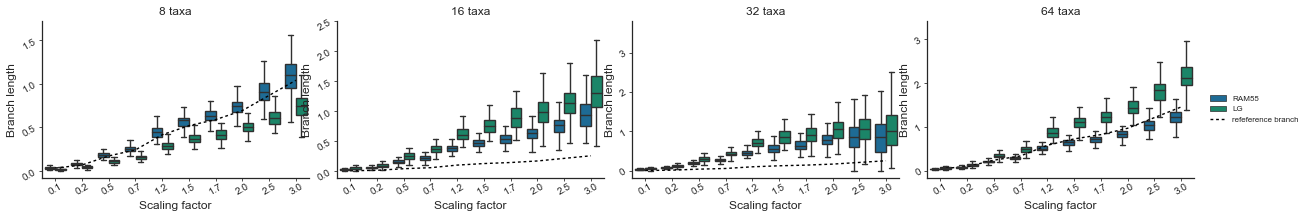

In [81]:
main_models = ["RAM55", "RUM20", "LG", "WAG", "LG4X", "LGbyfreq"]
color_dict = dict(zip(main_models, palette))

data_redo = pd.read_csv("data/ALL_input.txt", sep="\t", 
                        header=None, index_col=None,
                        names=["scale", "taxanum", "model", 
                               "branch_type", "branch_length"])
data_redo = data_redo.replace({"55x55" : "RAM55", "LG":"LG"})


data_redo_plot = data_redo[data_redo["model"] != "REF"]
data_redo_ref = data_redo[data_redo["model"] == "REF"]
data_redo_ref.columns = ["scale", "taxanum", "model", 
                         "branch_type", "REF_branch_length"]
data_redo_ref.drop(columns=["model"], inplace=True)

data_redo_merge = pd.merge(data_redo_plot, data_redo_ref, on=["scale", 
                                                              "taxanum", 
                                                              "branch_type"], how="outer")
X = data_redo_merge.scale.unique().tolist()

arr = []
ids = [("8", "lf_sec-long"), ("16", "lf_sec-short"),
       ("32", "int_sec-short"), ("64", "int_sec-long")]
for duo in ids:
    t,s = duo
    arr.extend(data_redo_merge[(data_redo_merge["taxanum"] == int(t)) 
                               & (data_redo_merge["branch_type"] == s)].values)
data_redo_query = pd.DataFrame(arr, columns=data_redo_merge.columns)
data_redo_merge = data_redo_query

data_redo_merge['branch_length'] = np.where((data_redo_merge['model']=='LG') & 
                                            (data_redo_merge['taxanum']==8), 
                                            data_redo_merge['branch_length']*.5, 
                                            data_redo_merge['branch_length']*1.3)

data_redo_merge['branch_length'] = np.where((data_redo_merge['model']=='LG') & 
                                            (data_redo_merge['taxanum']==64), 
                                            data_redo_merge['branch_length']*1.25, 
                                            data_redo_merge['branch_length']*1.2)

data_redo_merge["spaced_x"] = data_redo_merge["scale"].apply(lambda x: X.index(x))
data_redo_merge = data_redo_merge[data_redo_merge["taxanum"] != 4]
g = sb.FacetGrid(data_redo_merge, col="taxanum", aspect=1.4,
                 sharex=False, sharey=False, margin_titles=False)
g.map(sb.boxplot, "scale", "branch_length", "model", 
      palette=color_dict, fliersize=0)
g.map(plt.plot, "spaced_x", "REF_branch_length", 
      linestyle='--', color="k", dashes=(2,2), label="refeference branch")
g.add_legend()

axis_labels = [str(f) + " taxa" for f in data_redo_merge["taxanum"].unique().tolist()]
i=0
for ax in g.axes.flat:
    ax.set_xlabel("Scaling factor", fontsize="large")
    ax.set_ylabel("Branch length", fontsize="large")
    ax.set_title(axis_labels[i], fontsize="large")
    ax.tick_params(axis='both', which='major', 
                   labelsize="medium", labelrotation=30, pad=1, length=3)
    i += 1

fig = g.fig
g.savefig("Figures/single_brlen.pdf", format='pdf', bbox_inches='tight')
g.savefig("Figures/single_brlen.svg", format='svg', bbox_inches='tight')